In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/colabF/creditcard.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # scales the data to standard form none of the features have complete dominance(bigger in magnitude)
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from collections import Counter

In [4]:
# set dark background
plt.style.use('seaborn-v0_8')
sns.set_palette('Spectral')

In [5]:
# load the dataset
df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
df.dropna(inplace=True)

(0.0, 500.0)

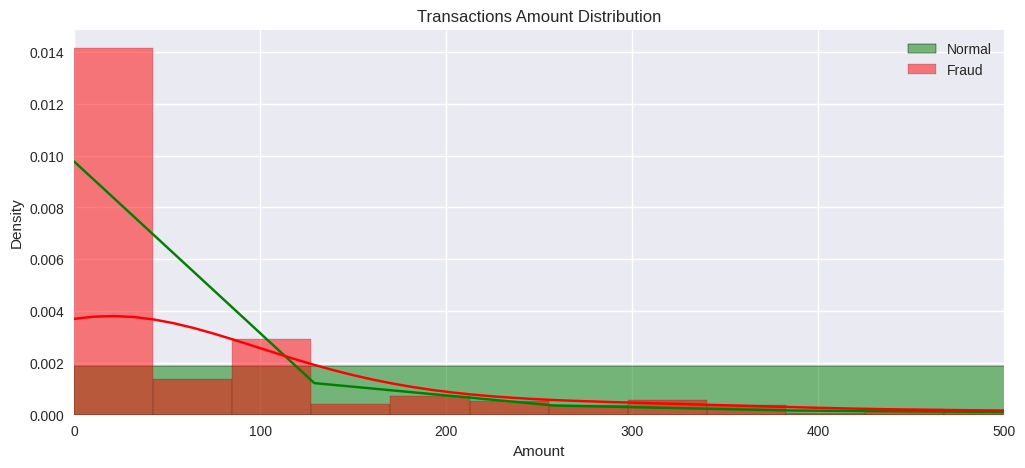

In [10]:
# exploratory data analysis

fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

plt.figure(figsize=(12, 5))
# plt.subplot(1,2,1) # 1row 2columns iterates over those

# compare transaction amounts
sns.histplot(normal['Amount'], bins = 50, kde=True, color='green', label='Normal', stat='density')
sns.histplot(fraud['Amount'], bins = 50, kde=True, color='red', label='Fraud', stat='density')
plt.title('Transactions Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.xlim(0,500)


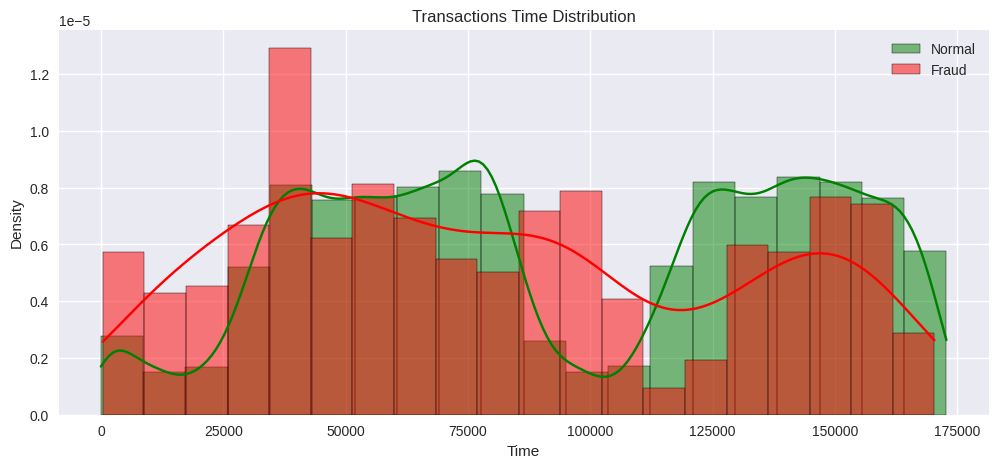

In [11]:
# Time analysis

plt.figure(figsize=(12, 5))
# plt.subplot(1,2,1) # 1row 2columns iterates over those
sns.histplot(normal['Time'], bins = 20, kde= True, color='green', label='Normal', stat='density')
sns.histplot(fraud['Time'], bins = 20, kde= True, color='red', label='Fraud', stat='density')
plt.title('Transactions Time Distribution')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()


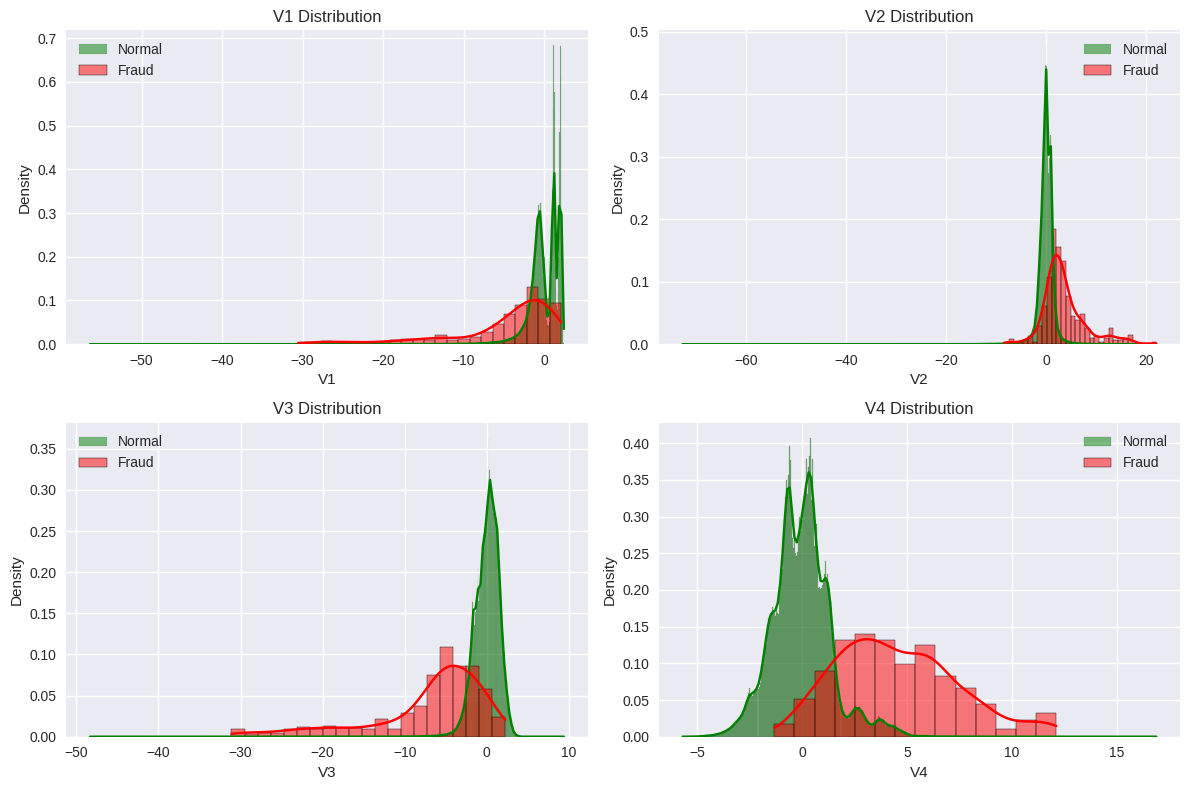

In [12]:
# PCA Feature exploration
plt.figure(figsize=(12,8))

for i in range(1,5):
  plt.subplot(2,2,i)
  feature = f'V{i}'
  sns.histplot(normal[feature], color='green', label='Normal', stat='density', kde=True)
  sns.histplot(fraud[feature], color='red', label='Fraud', stat='density', kde=True)
  plt.title(f'{feature} Distribution')
  plt.xlabel(feature)
  plt.ylabel('Density')
  plt.legend()
  plt.tight_layout()


<Axes: title={'center': 'Correlation Analysis'}>

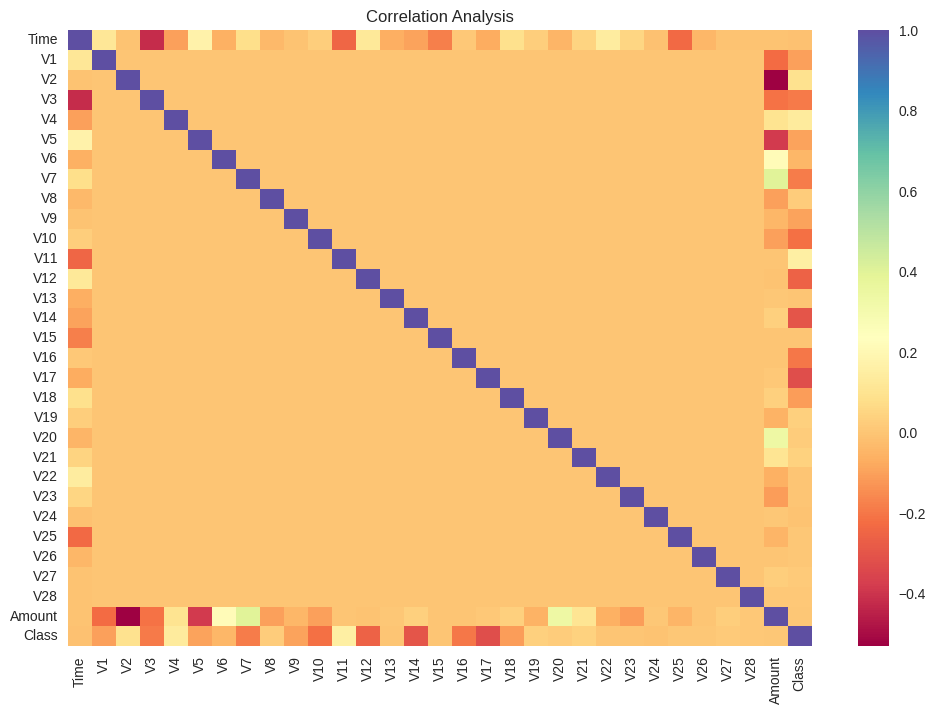

In [13]:
# correlation analysis
plt.figure(figsize=(12,8))
corr = df.corr()
plt.title('Correlation Analysis')
sns.heatmap(corr, annot=False, cmap='Spectral')
#

*Exploratory Data Analysis Insights*

Our visualizations highlight several key patterns:

Transaction Amount: Fraudulent transactions are generally smaller than normal ones. Many fraud attempts involve low amounts, likely as a tactic to avoid detection.

Transaction Time: The timing of fraudulent transactions follows a different distribution compared to legitimate ones, with certain periods showing higher concentrations of fraud.

PCA Components: Several principal components (notably V1, V2, V3, and V4) display distinct distributional differences between fraudulent and legitimate transactions, suggesting they will be strong predictors for our models.


Correlation Matrix: Some features exhibit strong correlations, which provides useful guidance for feature engineering and model selection.

In [14]:
# Data preprocessing

# scale amount and time - as the time and amount are of different values means our average amount was around 88 and time was around 2500 so
# we need to scale them as they don't get biased towards amount(as they are larger in thousands) would dominate time.
# Standardization ensures all features contribute fairly. As they perform better when features are on the same scale.

scaler = StandardScaler()

# Fit and transform both columns at once if they exist
cols_to_scale = []
if 'Amount' in df.columns:
    cols_to_scale.append('Amount')
if 'Time' in df.columns:
    cols_to_scale.append('Time')

if cols_to_scale:
    df[['scaled_amount', 'scaled_time']] = scaler.fit_transform(df[cols_to_scale])
    # Drop original Amount and Time columns if they exist
    df = df.drop(cols_to_scale, axis=1)


# split the data into features and target
X = df.drop('Class', axis = 1) # expect Class we need all columns to predict
y = df['Class']

# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify=y)
# stratify = to keep the class distribution of y the same in both train and test sets, which is crucial for imbalanced classification problems.

print('Training set shape:', X_train.shape)
print('Testing set shape:',  X_test.shape)
print('Frauds in training set:',  y_train.sum())
print('Frauds in testing set:',  y_test.sum())

Training set shape: (227845, 30)
Testing set shape: (56962, 30)
Frauds in training set: 394
Frauds in testing set: 98


In [15]:
# handling the class imbalance

# 1. using class weights (applied directly to model)

print("Original class distribution:", Counter(y_train))


Original class distribution: Counter({0: 227451, 1: 394})


In [16]:
# 2. using Random undersampling (reducing the high class distribution to reduce the size)
# Set fraud:normal ratio to 1:3

undersample = RandomUnderSampler(sampling_strategy=0.33, random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

print("Class distribution after undersampling:", Counter(y_train_under))


Class distribution after undersampling: Counter({0: 1193, 1: 394})


In [17]:
# 3. using SMOTE (Synthetic Minority Over-sampling Technique)
# Set fraud:normal ratio to 1:3

smote = SMOTE(sampling_strategy=0.33, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution after SMOTE: Counter({0: 227451, 1: 75058})


Text(0, 0.5, 'V2')

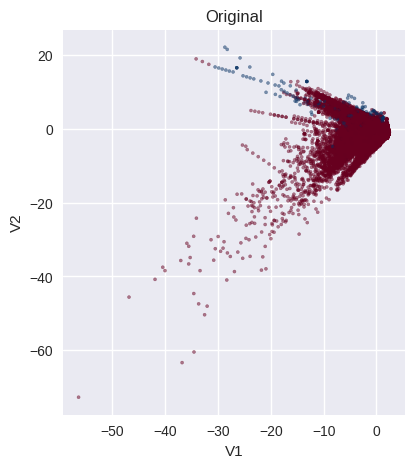

In [18]:
# Visualize the effect on 2 features
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 3, 1)
plt.scatter(X_train['V1'], X_train['V2'], c=y_train, alpha=0.5, s=5, cmap='RdBu')
plt.title('Original')
plt.xlabel('V1')
plt.ylabel('V2')

Text(0, 0.5, 'V2')

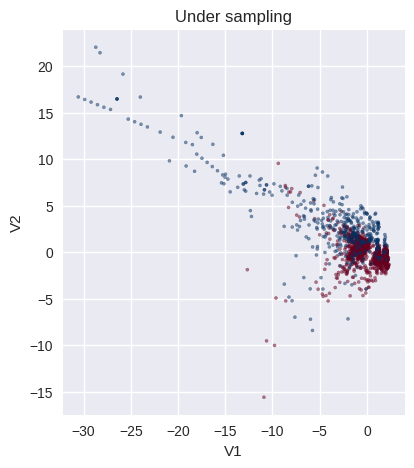

In [19]:
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 3, 1)
plt.scatter(X_train_under['V1'], X_train_under['V2'], c=y_train_under, alpha=0.5, s=5, cmap='RdBu')
plt.title('Under sampling')
plt.xlabel('V1')
plt.ylabel('V2')

Text(0, 0.5, 'V2')

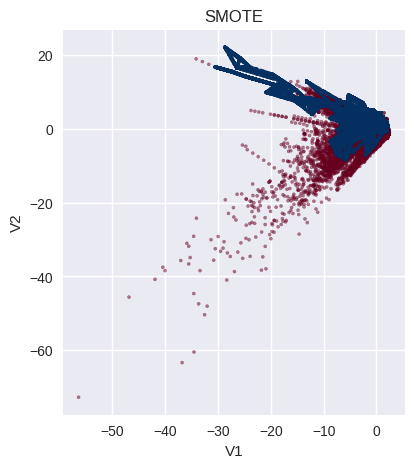

In [20]:
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 3, 1)
plt.scatter(X_train_smote['V1'], X_train_smote['V2'], c=y_train_smote, alpha=0.5, s=5, cmap='RdBu')
plt.title('SMOTE')
plt.xlabel('V1')
plt.ylabel('V2')

*`Handling Class Imbalance`*

Methods Tested:

Class Weights: Penalizes misclassification of minority class.

Random Undersampling: Reduced majority class to 1:3 ratio (394 fraud, 788 normal).

SMOTE: Synthetic fraud samples to achieve 1:3 ratio (75,817 fraud, 151,634 normal).

Insights from V1 vs. V2 Plots:

Original data: Few frauds, classes somewhat separable.

Undersampling: Maintains real patterns, smaller dataset.

SMOTE: Maintains size, synthetic samples may differ from real patterns.

Decision:
Use SMOTE-resampled data for modeling to ensure sufficient examples of both classes.

In [21]:
# Train the model

log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [22]:
# Make predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]



--- Logistic Regression Results ---
Confusion Matrix:
[[55431  1433]
 [    8    90]]


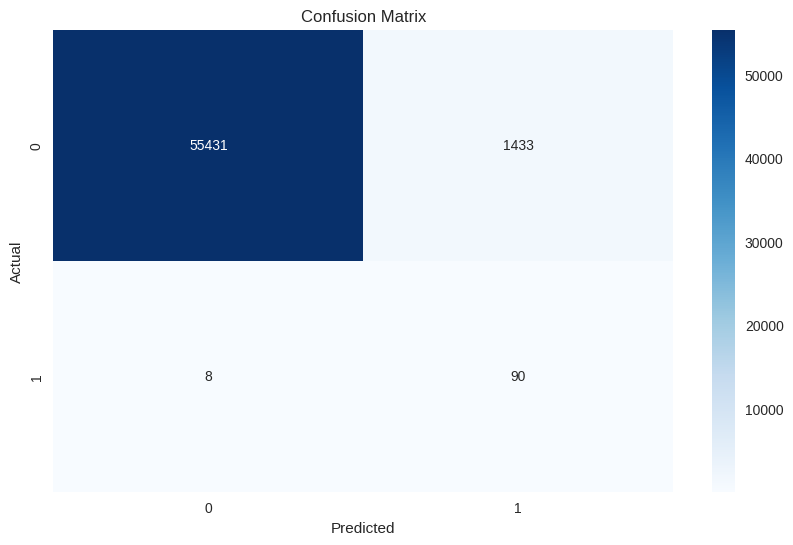

In [23]:
# evaluate the performance
print("\n--- Logistic Regression Results ---")
print("Confusion Matrix:")

cm = confusion_matrix(y_test, y_pred)
print(cm)

# plot the results
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# random forest model
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_classifier.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [25]:
y_pred_rf = rf_classifier.predict(X_test)
y_prob_rf = rf_classifier.predict_proba(X_test)[:,1]
#

Text(95.72222222222221, 0.5, 'Actual')

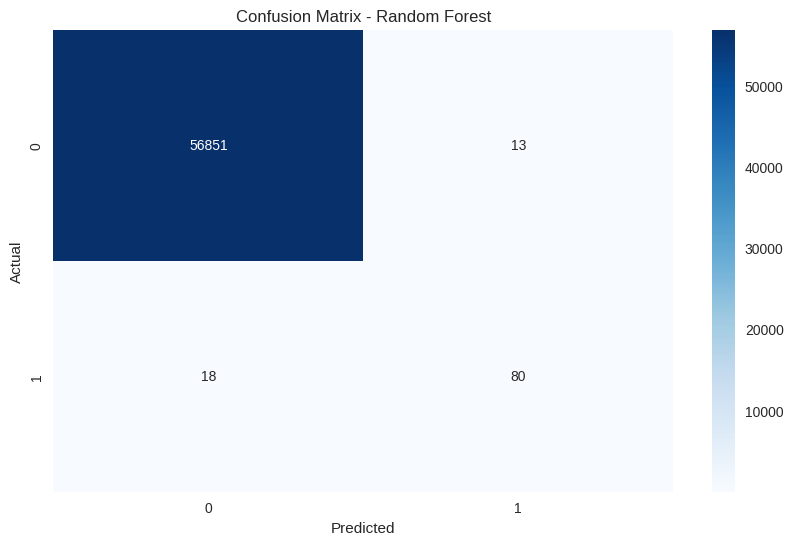

In [26]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

#plot
plt.figure(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

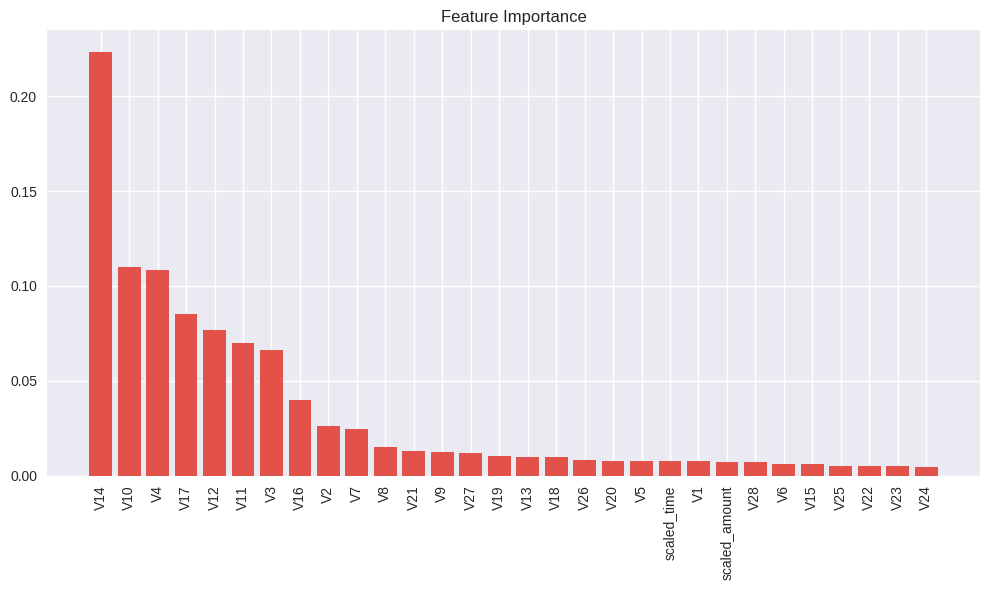

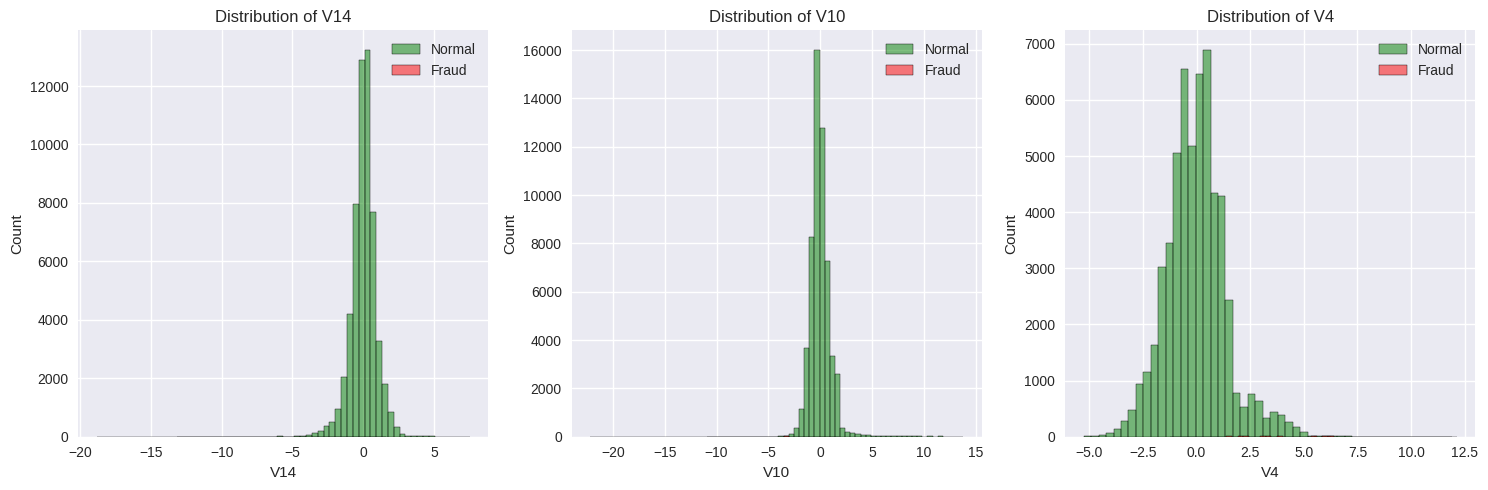

In [27]:
# -Feature Importance & Model Interpretation -
# Feature importance from Random Forest

plt.figure(figsize=(10, 6))
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.title('Feature Importance')
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Analyze most important features
top_features = [features[i] for i in indices[:3]]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(X_test[feature][y_test == 0], bins=50, alpha=0.5, label='Normal', color='green')
    sns.histplot(X_test[feature][y_test == 1], bins=50, alpha=0.5, label='Fraud', color='red')
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()